<div class="alert alert-block alert-success">
<b>Imported libraries</b>
</div>

In [1]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import shapiro

sns.set_style('white')

<div class="alert alert-block alert-info">
<b>Building a normal distribution</b>
</div>

In [2]:
nor = np.random.normal(loc = 5000, scale = 500, size = 1000)

<div class="alert alert-block alert-info">
<b>Getting the parameters</b>
</div>

In [3]:
parameters_norm = stats.norm.fit(nor)
# Parameters
mean_norm, std_norm = parameters_norm
norm_pdf = stats.norm.pdf(nor, mean_norm, std_norm)
print('Mean:',mean_norm, '|', 'Standard Deviation:',std_norm)

Mean: 5024.573327651735 | Standard Deviation: 511.3210136274098


<div class="alert alert-block alert-info">
<b>Histogram</b>
</div>

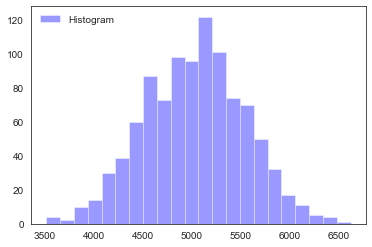

In [4]:
ax = sns.distplot(nor, color = 'blue', hist = True, kde = False, label = 'Histogram')
plt.legend(loc = 'upper left', prop = {'size':10}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Probability density function (PDF)</b>
</div>

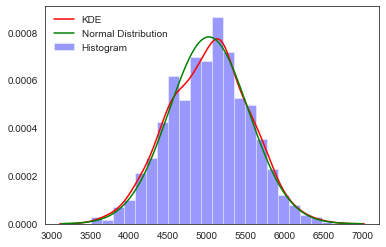

In [5]:
ax = sns.distplot(nor, 
                  kde_kws={'shade': False, 'color': 'r', 'label': 'KDE'}, 
                  fit = stats.norm,
                  fit_kws = {'color': 'g', 'label': 'Normal Distribution'},
                  hist = True, color = 'blue', label = 'Histogram')

# Manual normal distribution
# ax = sns.lineplot(nor, norm_pdf, color = 'black', label = 'Normal Distribution')

plt.legend(loc = 'upper left', prop = {'size':10}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Cumulative density function (PDF)</b>
</div>

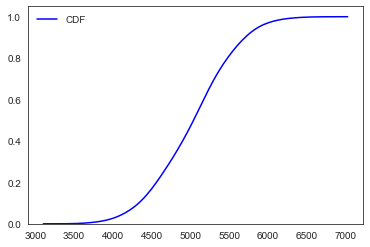

In [6]:
ax = sns.kdeplot(nor, color = 'blue', cumulative = True, label = 'CDF')
plt.legend(loc = 'upper left', prop = {'size':10}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Shapiro's test for normal distribution and Q-Q Plot</b>
</div>

Statistic: 0.998
p-value: 0.493

Null hypothesis of normality is accepted


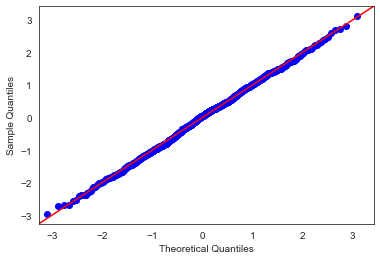

In [7]:
normal = shapiro(nor)
print('Statistic: %.3f' % (normal[0]))
print('p-value: %.3f\n' % (normal[1]))
if normal[1] <= 0.05:
    print('Null hypothesis of normality is rejected')
else:
    print('Null hypothesis of normality is accepted')

sm.qqplot(nor, stats.norm, fit = True, line = '45') 
plt.show()

<div class="alert alert-block alert-info">
<b>Answering some questions about the data</b>
</div>

In [8]:
#To find the probability that the variable has a value LESS than or equal
#let's say 5000, you'd use CDF cumulative Density Function
stats.norm.cdf(5000, loc = 5000, scale = 500)

0.5

In [9]:
#To find the probability that the variable has a value GREATER than or
#equal to let's say 6000, you'd use SF Survival Function 
gre = stats.norm.sf(4500, loc = 5000, scale = 500)
res = 1 - gre
print(gre)
print(res)

0.8413447460685429
0.15865525393145707


In [10]:
#To find the variate for which the probability is given, let's say the 
#value which needed to provide a 98% probability, you'd use the 
#PPF Percent Point Function
stats.norm.ppf(res, loc = 5000, scale = 500)

4500.0